<a href="https://colab.research.google.com/github/ltbl0528/algorithmpractice/blob/main/learncotest2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**탐욕법 Greedy Algorithm**



---



*   매 '순간'마다 **최선의 경우**👍만 골라 간다
*   다른 경우는 고려 ❌ 나중을 생각 ❌


> 예를 들어 A, B, C, D 가 있을 때, B를 고르는 것이 지금 최선이지만, 나중을 고려했을 땐 D가 최선일 때를 그리디 알고리즘은 고려하지 않음



*   모든 경우를 보지 않으니, *완전탐색보다 빠르다*!
*   어떤 경우가 **최선**인지 찾는 게 포인트 -> 규칙성을 찾아야 하기도





##**그리디 문제의 진짜 어려운 부분**

우리는 이 문제가 그리디 문제인지 판별하기 어렵다😓  
-> 이 문제가 진짜 그리디일까...? 그리디로 접근하면 반례가 있지 않을까...?

##**예제**

###**동전 거스름돈 문제🪙**
10, 50, 100, 500원 동전들을 무한히 갖고 있다.   
손님에게 800원을 거슬러주려고 할 때, 동전을 최소한으로 주는 방법은?

In [ ]:
change = 800
coin = 0
while change:
  if change / 500 > 1:
    coin += change // 500
    change = change % 500
  elif change / 100 > 1:
    coin += change // 100
    change = change % 100
  elif change / 50 > 1:
    coin += change // 50
    change = int(change % 50)
  elif change / 10 > 1:
    coin += change // 10
    change = int(change % 10)

print(coin)

4


이 문제를 푸는 방법은 가장 단위가 큰 동전부터 줄 수 있는 만큼 주고, 남은 금액을 그 다음 단위가 큰 동전...(후략)  
즉, **단위가 '큰' 동전 순서**대로 준다! -> *그리디!*  
</br>

---

</br>

> 그렇다면, 100, 400, 500원 동전을 무한히 갖고 있다면? 손님에게 800원을 거슬러주려고 할 때 어떻게 해야 할까?  
이번에는 단위가 가장 큰 500원부터 주는 것보다, 400원 동전을 2개 주는 것이 최소다.  
**따라서, 이 문제는 그리디로 풀 수 없다!**

</br>

**왜⁉ 무슨 차이가 있기에?** 🤔

앞선 문제는 작은 단위들이 큰 단위의 **배수 관계**였다. 그러므로 가장 큰 단위(500)는 작은 단위들의 배수.  
but, 400, 500은 배수 관계가 ❌  
(가장 큰 단위를 거슬렀을 때 가장 이득이 아닐 수 있다는 반례가 생겨버린다...)


###[백준 - 11047. 동전 0](https://www.acmicpc.net/problem/11047)

준규가 가지고 있는 동전은 총 N종류이고, 각각의 동전을 매우 많이 가지고 있다.

동전을 적절히 사용해서 그 가치의 합을 K로 만들려고 한다. 이때 필요한 동전 개수의 최솟값을 구하는 프로그램을 작성하시오.

첫째 줄에 N과 K가 주어진다. (1 ≤ N ≤ 10, 1 ≤ K ≤ 100,000,000)

둘째 줄부터 N개의 줄에 동전의 가치 Ai가 오름차순으로 주어진다. (1 ≤ Ai ≤ 1,000,000, A1 = 1, i ≥ 2인 경우에 Ai는 Ai-1의 배수)

첫째 줄에 K원을 만드는데 필요한 동전 개수의 최솟값을 출력한다.

In [ ]:
#컴공선배 풀이

n, k = map(int, input().split())
coins = [int(input()) for _ in range(n)] #동전의 가치를 입력받는다
coins.reverse() #제일 큰 단위가 앞에 오도록

ans = 0 #답을 저장할 변수 선언

for coin in coins :
  ans += k // coin
  k %= coin
  
print(ans)

10 4200
1
5
10
50
100
500
1000
5000
10000
50000
6


###[백준 - 1449. 수리공 항승](https://www.acmicpc.net/problem/1449)


항승이는 품질이 심각하게 나쁜 수도 파이프 회사의 수리공이다. 항승이는 세준 지하철 공사에서 물이 샌다는 소식을 듣고 수리를 하러 갔다.

파이프에서 물이 새는 곳은 신기하게도 가장 왼쪽에서 정수만큼 떨어진 거리만 물이 샌다.

항승이는 길이가 L인 테이프를 무한개 가지고 있다.

항승이는 테이프를 이용해서 물을 막으려고 한다. 항승이는 항상 물을 막을 때, 적어도 그 위치의 좌우 0.5만큼 간격을 줘야 물이 다시는 안 샌다고 생각한다.

물이 새는 곳의 위치와, 항승이가 가지고 있는 테이프의 길이 L이 주어졌을 때, 항승이가 필요한 테이프의 최소 개수를 구하는 프로그램을 작성하시오. 테이프를 자를 수 없고, 테이프를 겹쳐서 붙이는 것도 가능하다.

첫째 줄에 물이 새는 곳의 개수 N과 테이프의 길이 L이 주어진다. 둘째 줄에는 물이 새는 곳의 위치가 주어진다. N과 L은 1,000보다 작거나 같은 자연수이고, 물이 새는 곳의 위치는 1,000보다 작거나 같은 자연수이다.

첫째 줄에 항승이가 필요한 테이프의 개수를 출력한다.

In [ ]:
#컴공선배 풀이
N, L = map(int, input().split())
coordi = [False] * 1001 #좌표에 모두 false를 집어 넣음(구멍난 곳만 true로 표시할 수 있게)
for i in map(int, input().split()):
  coordi[i] = True

ans = 0
x = 0 #현재 살펴보고 있는 좌표

while x < 1001:
  if coordi[x]: #구멍난 칸
    ans += 1 #테이프 하나 쓰고
    x += L #테이프 길이만큼 좌표 건너 뛰기
  else:
    x += 1

print(ans)

5 1
100 74 23 99 366
5


In [ ]:
#만약 좌표가 1000이 훨씬 넘는 너무 큰 숫자라면?
N, L = map(int, input().split())
coordi = list(map(int, input().split())) #좌표 압축
coordi.sort()

ans = 0

for i in range(N):
  for j in range(N):
    if (coordi[i] + L) == coordi[j]:
      

print(ans)

4 3
1 2 3 4
3


###[백준 - 2839. 설탕 배달](https://www.acmicpc.net/problem/2839)

상근이는 요즘 설탕공장에서 설탕을 배달하고 있다. 상근이는 지금 사탕가게에 설탕을 정확하게 N킬로그램을 배달해야 한다. 설탕공장에서 만드는 설탕은 봉지에 담겨져 있다. 봉지는 3킬로그램 봉지와 5킬로그램 봉지가 있다.

상근이는 귀찮기 때문에, 최대한 적은 봉지를 들고 가려고 한다. 예를 들어, 18킬로그램 설탕을 배달해야 할 때, 3킬로그램 봉지 6개를 가져가도 되지만, 5킬로그램 3개와 3킬로그램 1개를 배달하면, 더 적은 개수의 봉지를 배달할 수 있다.

상근이가 설탕을 정확하게 N킬로그램 배달해야 할 때, 봉지 몇 개를 가져가면 되는지 그 수를 구하는 프로그램을 작성하시오.

첫째 줄에 N이 주어진다. (3 ≤ N ≤ 5000)

상근이가 배달하는 봉지의 최소 개수를 출력한다. 만약, 정확하게 N킬로그램을 만들 수 없다면 -1을 출력한다.

In [ ]:
N = int(input())
ans = 0

if N % 5 <= 3 and N % 5 > 0:
  ans += N // 5
  ans += N // 3
  print(ans)
elif N // 5 >= 1 and N % 5 == 0:
  ans += N // 5
  N %= 5
elif N // 3 >= 1 and N % 3 == 0:
  ans += N // 3
  N %= 3
else:
  print(-1)

if N == 0:
  print(ans)

22
11


##**정리**


1.   무식하게 모든 경우의 수를 살펴봐도 시간 초과가 나지 않을지 확인
2.   시간 초과 ❌ -> 완탐  
안될 거 같으면 다른 효율적인 알고리즘 찾기 (ex) 그리디, DP, 이분법...
3.   그리디는 반례가 없을지 신중히 고려



#**DFS, BFS, 백트래킹**

완전탐색 알고리즘의 일종

## **들어가기 전, 알아야 할 자료구조**

## **그래프 Graph**

개념들의 관계를 도식화해서 나타내는 자료구조  

*   지도, 내비게이션
*   SNS / 메신저
*   VCS(Version Control System) 버전 관리 시스템

![Image in a markdown cell](https://media.vlpt.us/images/minjae-mj/post/f8d49d11-5ae1-4fad-aced-ada992c8bcf0/graph.png)

### **그래프의 종류**

**-그래프에 방향성이 있는가?**

*   **무방향 그래프**(=양방향 그래프) : 방향 ❌ (위의 사진처럼 방향에 따른 제한이 없음)
*   **방향 그래프** : 방향 ⭕ ( 0 -> 1 이런 식으로 방향이 나 있다면 0에서 1로는 갈 수 있지만, 1에서 0으론 갈 수 없다.)

**-그래프 전체를 통틀어 사이클이 있는가?**

* **순환 그래프** : 방향 그래프 중 사이클이 있는 그래프
* **비순환 그래프** : 방향 그래프 중 사이클이 없는 그래프  

<br/>

---

- 방향성 비순환 그래프 **DAG, Directed Acyclic Graph**


![Image in a markdown cell](https://hazelcast.com/wp-content/uploads/2021/12/diagram-DAG-2.png)

  예 : VCS(버전 관리 시스템) -> 방향성은 띄지만, 사이클은 존재하지 않음

- 연결 요소 **Connected Component**


![Image in a markdown cell](https://media.geeksforgeeks.org/wp-content/uploads/20200421194558/Count-of-Connected-Components.png)





## **트리 Tree**

순환성이 없는 무방향 그래프  

  
![tree image](https://miro.medium.com/max/975/1*PWJiwTxRdQy8A_Y0hAv5Eg.png)



*   특정하지 않는 한 어떤 노드든지 **루트(root)**가 될 수 있다
*   가장 바깥쪽 노드는 **리프 노드(leaf node)**
*  node A ➡ node B의 경로는 **반드시 존재**하며, **유일**하다
* **node 개수 = 간선(edge) 개수 + 1** (tree 여부를 파악할 수 있음)

<br/>

---



*   자료구조에서의 트리는 **부모 ➡ 자식 관계**가 있는 **방향 그래프**이다.
*   **루트 root는 하나**다

![datastructure_tree](https://jeremykun.files.wordpress.com/2012/09/tree.png)


방향성 있는 트리가 문제에 자주 나오긴 하는데, 앞선 트리도 나오기 때문에 문제에 따라서 잘 보기!

##  **코드로 그래프를 나타내는 법**



1.   **인접행렬**
![](https://t1.daumcdn.net/cfile/tistory/99F7B9485B54360A21)
**row number**는 edge의 **시작 index**, **column number**는 **도착 index**

(0, 1)은 0 ➡ 1의 edge를 나타냄. edge가 있는 부분에만 1로 표시함.  
무방향 그래프(양방향 그래프)는 행렬 대각선(n,n)을 기준으로 **대칭 구조**를 이룸.
2.   **인접리스트**

![](https://img1.daumcdn.net/thumb/R800x0/?scode=mtistory2&fname=https%3A%2F%2Fblog.kakaocdn.net%2Fdn%2Fd9EdOy%2FbtqGkkp1Hex%2F7SX8nIxICPltLHnaPsz2Ik%2Fimg.jpg)  

인접행렬과 차이점 : edge가 없는 부분도 공간이 할당됐지만, **인접리스트는 edge가 있는 부분만 공간이 할당**됨

연결리스트로 보이지만, 실제 구현할 때는 **C++에서는 vector**, **Python에서는 리스트**를 쓰는 경우가 많음

### **인접행렬 vs 인접리스트**

1. **메모리 측면**의 차이  
  **인접행렬**은 **node가 N**개라면 무조건! **N^2의 메모리**를 쓰게 됨 (간선이 몇 개든 상관 ❌)

  **인접리스트**는 **간선 개수가 적을수록** 메모리 할당량도 적어짐 ➡ 메모리 측면에서 유리!

2. **시간 복잡도**의 차이  
시간 <-> 공간이므로, **인접행렬**은 **임의 접근**을 통해 **O(1)의 시간 복잡도로 간선 탐색**가능!  
  **인접리스트**는 **임의 접근이 불가능**하므로(벡터나 리스트로 구현했더라도), (0, 3)에 간선이 있는지 보려면 0번 행을 다 돌며 3이 있는지 검사하는 수밖에 없음... **시간 복잡도 O(N)** 😞


<br/>

---

<br/>

따라서, 정점 N개에 간선 N^2라면, 인접행렬이 유리하다.  
but 정점 N개에 간선 2N개라면 인접리스트를 쓰는 게 나을 수도 있다!

➡ 문제 입력 조건을 보고 어느 쪽을 쓸지 따져보기

**시간복잡도**
  * 인접행렬 : **O(V^2)** [V는 정점]  
  인접행렬은 V * V 의 행렬을 전부 살펴봐야 하기 때문에
  * 인접리스트 : **O(V+E)** [E는 간선]  
    O(max(V,E))와 같음  
    if E 가 V^2이면 O(V^2)이 됨

## **DFS(Depth First Search) 깊이 우선 탐색**

탐색 알고리즘 중 하나(**완전 탐색**)  
**스택 or 재귀를 사용**해서 구현한다.  

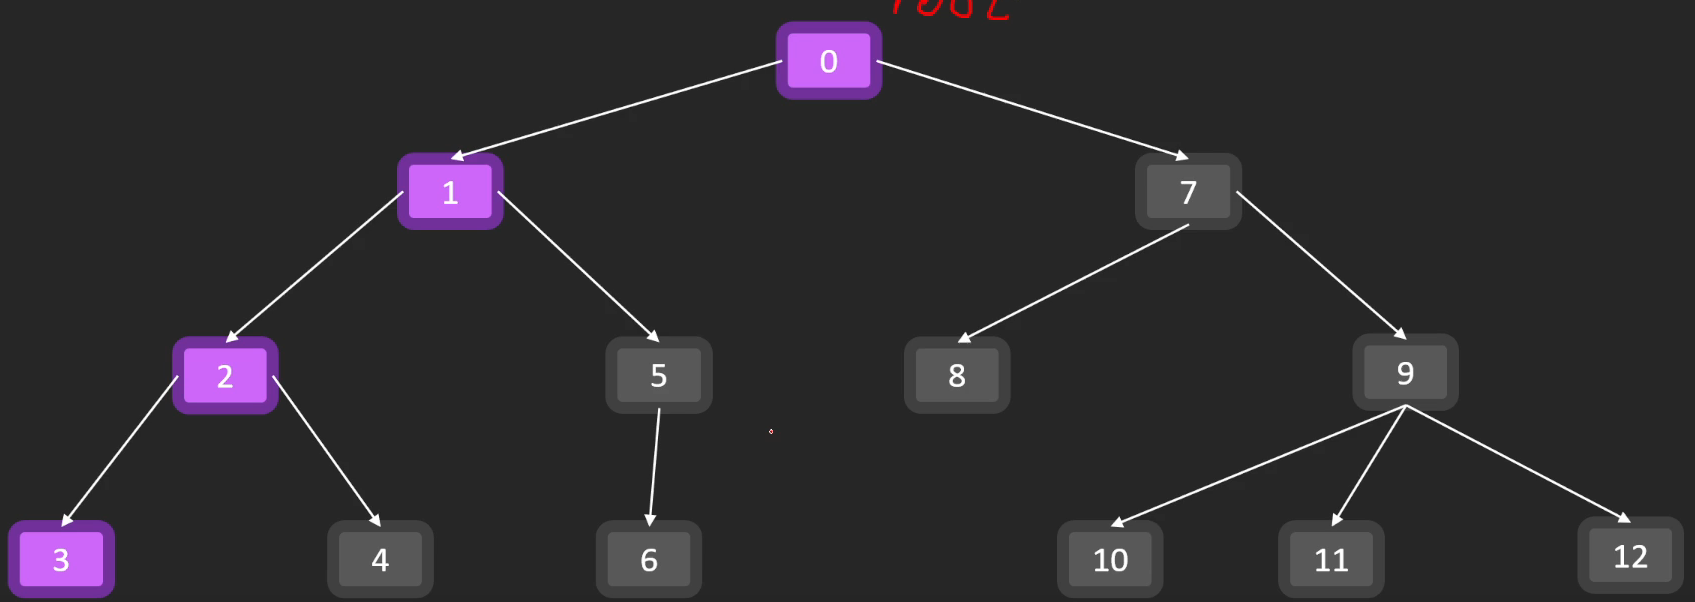

**순서**가 중요하다.  
더 갈 수 없을 때까지 깊게 내려갔다가 돌아오기 때문에 깊이 우선 탐색

In [ ]:
#위의 그래프를 코드로 구현

adj = [[0] * 13 for _ in range(13)] #인접행렬
adj[0][1] = adj[0][7] = 1
adj[1][2] = adj[1][5] = 1 #간선이 있는 곳에 1표시
#... 생략(수동으로 넣는 건 너무 노가다니까...)

def dfs(now): #now는 현재 node
  for nxt in range(13): #nxt는 다음 방문할 node 번호
    if adj[now][nxt]:
      dfs(nxt) #재귀를 통한 구현

dfs(0)

## **BFS(Breadth First Search) 너비 우선 탐색**

탐색 알고리즘 중 하나 (**완전 탐색**)  
**큐를 사용**해서 구현한다  

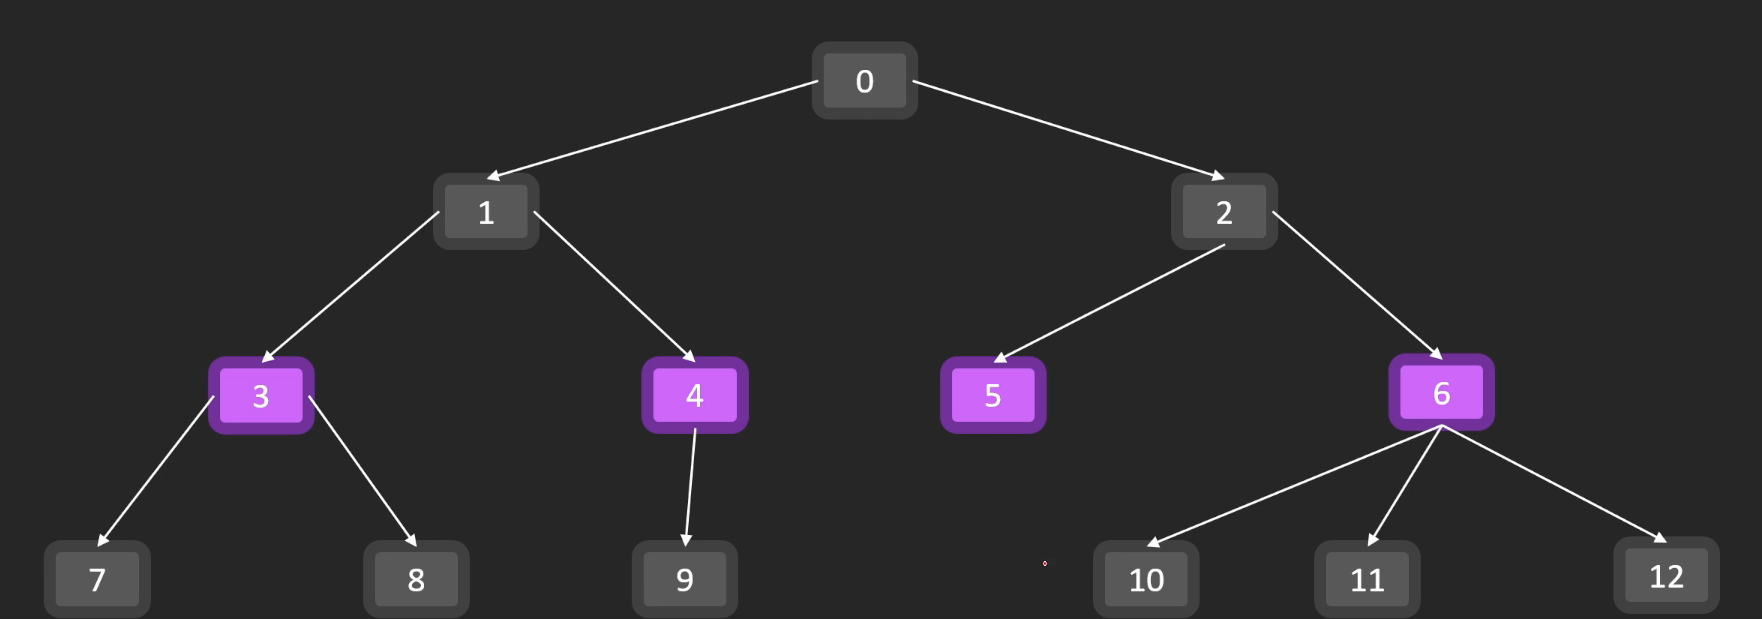

**순서**
1. 0에서 볼 수 있는 애들을 모두 봄(1, 2)
2. 1에서 볼 수 있는 애들을 모두 봄(3, 4)

  (생략)

**Queue로 구현하는 법**은, 
1. 현재 탐색할 node(들)을 queue에 넣어두고 
2. queue에 들어있는 값을 하나씩 뺀 다음에 그 빼진 값에서 갈 수 있는 node를 찾고
3. 또 그 값을 queue에 집어 넣는 걸 반복...

In [ ]:
#위의 그래프를 코드로 구현
from collections import deque

adj = [[0] * 13 for _ in range(13)] #인접행렬
adj[0][1] = adj[0][2] = 1
adj[1][3] = adj[1][4] = 1 #간선이 있는 곳에 1표시
#... 생략(수동으로 넣는 건 너무 노가다니까...)

def bfs():
  dq = deque()
  dq.append(0) #탐색 시작할 root node 삽입
  while dq: #deque이 빌 때까지 반복
    now = dq.popleft() #현재 값을 빼줌
    for nxt in range(13):
      if adj[now][nxt]: #다음 node가 존재하면
        dq.append(nxt) #그 node를 dq에 삽입

bfs()

## **DFS & BFS**


*   공통점
*   차이점





### **공통점**



1.   그래프 탐색 알고리즘
2.   완전 탐색 알고리즘  
  ▶ 완전 탐색 장단점을 똑같이 가짐(모든 경우의 수를 살피기 때문에 답을 반드시 찾는다 😀 / but 느리다 😞)






### **차이점**

1.   탐색 순서가 다르다  
5번 node까지의 최단 거리를 묻는 문제가 나온다면...? ➡ BFS가 더 유리  

 > BFS는 시작노드에서 거리를 1씩 늘려가면서 모든 그 거리 내의 모든 노드를 탐색하기 때문에, 목표 노드가 나오면 최단 거리라고 보장하고 탐색을 종료할 수 있음 (DFS는 깊이 탐색이기 때문에 이런 게 불가능함)



## **길찾기 문제**

* 지도 상에서 바로 구현하는 게 일반적이다  
* 코드도 기본적인 틀이 정해져 있음  
* 보통 4방향이 많음 (동서남북)
* 방향값을 미리 코드에 짜두고 for문으로 순회하는 기법을 꼭 익혀두자



```
// C++

//상대 좌표값을 미리 저장
const int dy[4] = {0, 1, 0, -1};
const int dx[4] = {1, 0, -1, 0};
int N;
bool chk[100][100]; //방문 체크(반드시 해줘야 함)

//x, y를 거꾸로 쓴 이유: 행은 세로로 움직임, 열은 가로로 움직이기 때문
//좌표가 유효한 범위 내에 있는지 범위 체크
bool isValidCoord(int y, int x) {
  return 0 <= y && y < N && 0 <= x && x < N;
}

void dfs(int y, int x) { 
  chk[y][x] = true;
  for (int k = 0; k < 4; ++k) {
    int ny = y + dy[k];
    int nx = x + dx[k];
    if (isValidCoord(ny, nx) && !chk[ny][nx])
      dfs(ny, nx);
  }
}
```



In [ ]:
#Python
from collections import deque

dy = (0, 1, 0, -1) # 순서대로 우, 하, 좌, 상
dx = (1, 0, -1, 0) # 순서대로 우, 하, 좌, 상
chk = [[False] * 100 for _ in range(100)]
N = int(input())

def is_valid_coord(y, x):
  return 0 <= y < N and 0 <= x < N

def bfs(start_x, start_y): #탐색 시작 좌표
  q = deque()
  q.append((start_x, start_y))
  while len(q) > 0:
    y, x = q.popleft()
    chk[y][x] = True
    for k in range(4):
      ny = y + dy[k]
      nx = x + dx[k]
      if is_valid_coord(ny, nx) and not chk[ny][nx]:
        q.append((ny, nx))